# Trabalho prático DAA

### The Data

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [3]:
data = pd.read_csv('sbstpdaa2223/training_data.csv')
test = pd.read_csv('sbstpdaa2223/test_data.csv')

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

<AxesSubplot:>

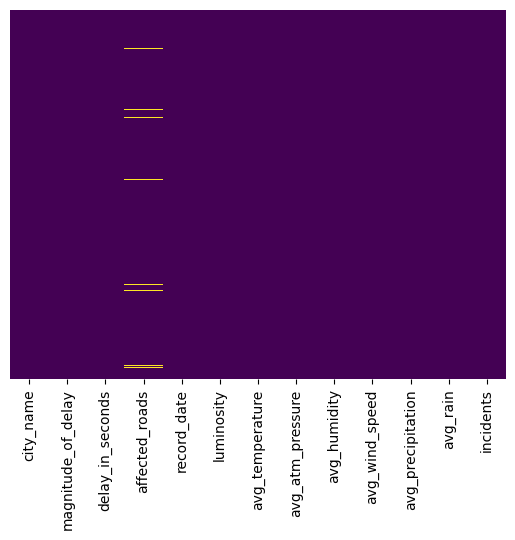

In [4]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [5]:
data.drop(['affected_roads'], axis = 1, inplace = True)
test.drop(['affected_roads'], axis = 1, inplace = True)

In [6]:
data.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [7]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [8]:
data.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)
test.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)

In [9]:
data.isnull().sum()

magnitude_of_delay    0
delay_in_seconds      0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_rain              0
incidents             0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


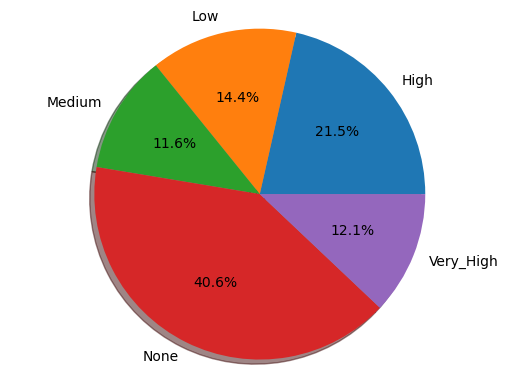

In [12]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()


/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


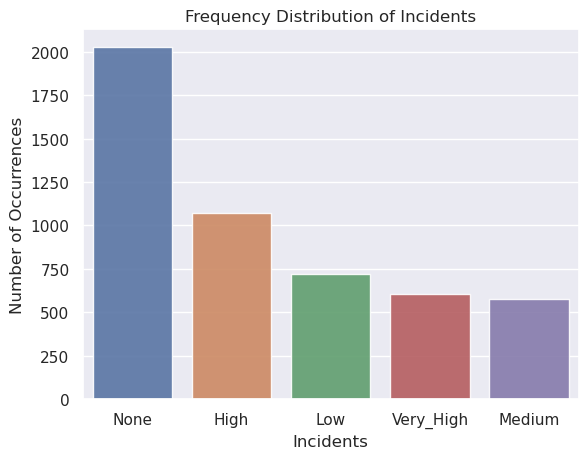

In [13]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")

sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)

plt.show()

In [14]:
replace_map = {'incidents': {'None': 0, 'Low': 1, 'Medium': 2, 'High' : 3, 'Very_High':4}}

In [15]:
data.replace(replace_map, inplace = True)
test.replace(replace_map, inplace = True)
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,0
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,0
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3


In [16]:
data['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [17]:
replace_map_rain = {'avg_rain': {'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}}

In [18]:
data.replace(replace_map_rain, inplace = True)
test.replace(replace_map_rain, inplace = True)
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0,0
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0,0
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0,3


In [19]:
data['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [20]:
replace_map_luminosity = {'luminosity': {'LOW_LIGHT' : 0, 'LIGHT' : 1, 'DARK' : 2}}

In [21]:
data.replace(replace_map_luminosity, inplace = True)
test.replace(replace_map_luminosity, inplace = True)
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,2,12.0,1013.0,70.0,1.0,0,0
1,UNDEFINED,385,2021-12-25 18:00,2,12.0,1007.0,91.0,1.0,0,0
2,UNDEFINED,69,2021-03-12 15:00,1,14.0,1025.0,64.0,0.0,0,1
3,MAJOR,2297,2021-09-29 09:00,1,15.0,1028.0,75.0,1.0,0,4
4,UNDEFINED,0,2021-06-13 11:00,1,27.0,1020.0,52.0,1.0,0,3


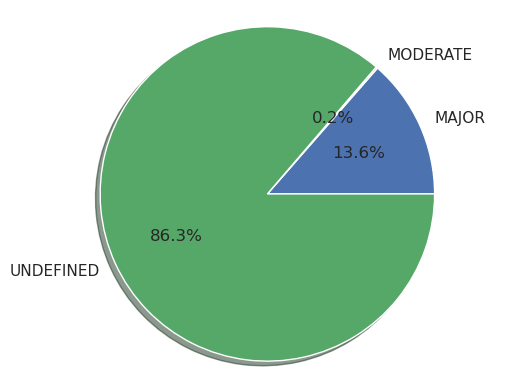

In [22]:
labels = data['magnitude_of_delay'].astype('category').cat.categories.tolist()
counts = data['magnitude_of_delay'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()

In [23]:
data.loc[data['magnitude_of_delay'] == 'MAJOR']['incidents'].value_counts()

4    366
3    162
2     65
1     62
0     23
Name: incidents, dtype: int64

In [24]:
data.drop(['magnitude_of_delay'], axis = 1, inplace = True)
test.drop(['magnitude_of_delay'], axis = 1, inplace = True)

In [25]:
data.head()

,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0,2021-03-15 23:00,2,12.0,1013.0,70.0,1.0,0,0
1,385,2021-12-25 18:00,2,12.0,1007.0,91.0,1.0,0,0
2,69,2021-03-12 15:00,1,14.0,1025.0,64.0,0.0,0,1
3,2297,2021-09-29 09:00,1,15.0,1028.0,75.0,1.0,0,4
4,0,2021-06-13 11:00,1,27.0,1020.0,52.0,1.0,0,3


In [26]:
data_dt = data.copy()

In [27]:
data_dt['record_date'] = pd.to_datetime(data_dt['record_date'], format='%Y-%m-%d %H:%M', errors='coerce')

In [28]:
data_dt['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [29]:
data['date_year'] = data_dt['record_date'].dt.year
data['date_month'] = data_dt['record_date'].dt.month
data['date_day'] = data_dt['record_date'].dt.day
data['date_hour'] = data_dt['record_date'].dt.hour
data.drop(['record_date'], axis=1, inplace = True)
test['date_year'] = data_dt['record_date'].dt.year
test['date_month'] = data_dt['record_date'].dt.month
test['date_day'] = data_dt['record_date'].dt.day
test['date_hour'] = data_dt['record_date'].dt.hour
test.drop(['record_date'], axis=1, inplace = True)
data.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,date_year,date_month,date_day,date_hour
0,0,2,12.0,1013.0,70.0,1.0,0,0,2021,3,15,23
1,385,2,12.0,1007.0,91.0,1.0,0,0,2021,12,25,18
2,69,1,14.0,1025.0,64.0,0.0,0,1,2021,3,12,15
3,2297,1,15.0,1028.0,75.0,1.0,0,4,2021,9,29,9
4,0,1,27.0,1020.0,52.0,1.0,0,3,2021,6,13,11


In [30]:
data['date_year'].unique()

array([2021])

In [31]:
data.drop(['date_year'], axis=1, inplace = True)
test.drop(['date_year'], axis=1, inplace = True)

In [32]:
data.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,date_month,date_day,date_hour
0,0,2,12.0,1013.0,70.0,1.0,0,0,3,15,23
1,385,2,12.0,1007.0,91.0,1.0,0,0,12,25,18
2,69,1,14.0,1025.0,64.0,0.0,0,1,3,12,15
3,2297,1,15.0,1028.0,75.0,1.0,0,4,9,29,9
4,0,1,27.0,1020.0,52.0,1.0,0,3,6,13,11


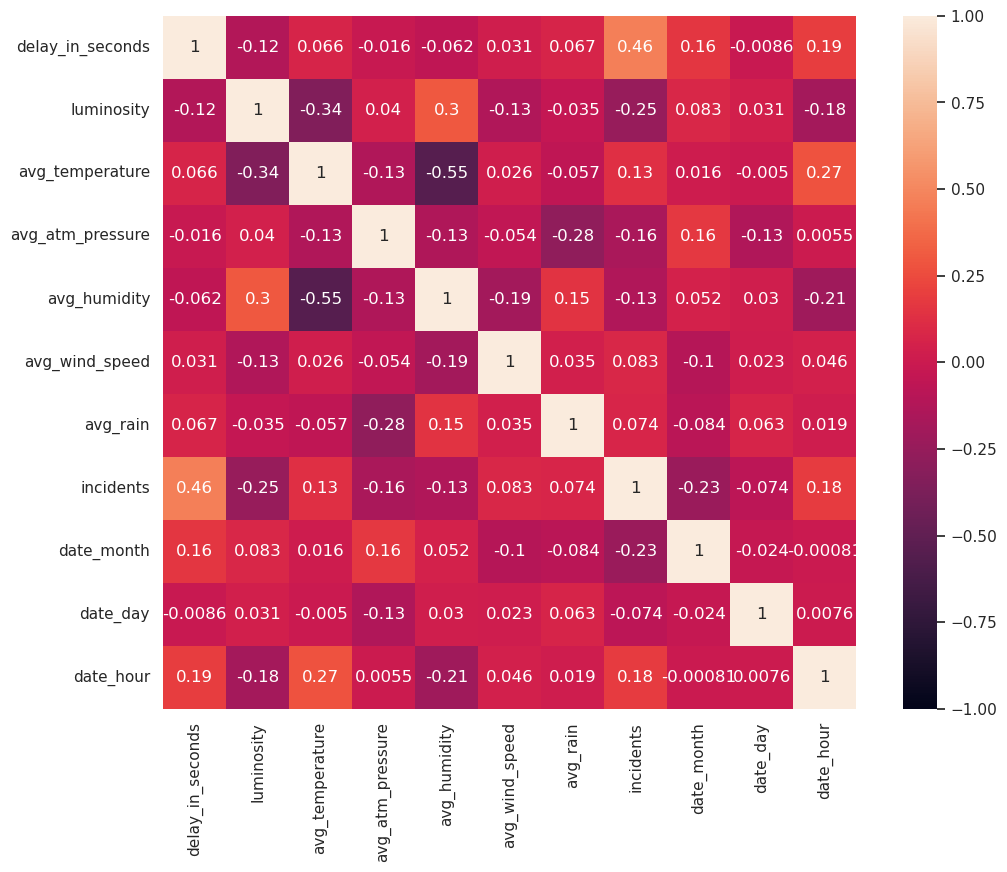

In [33]:
#Correlation
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

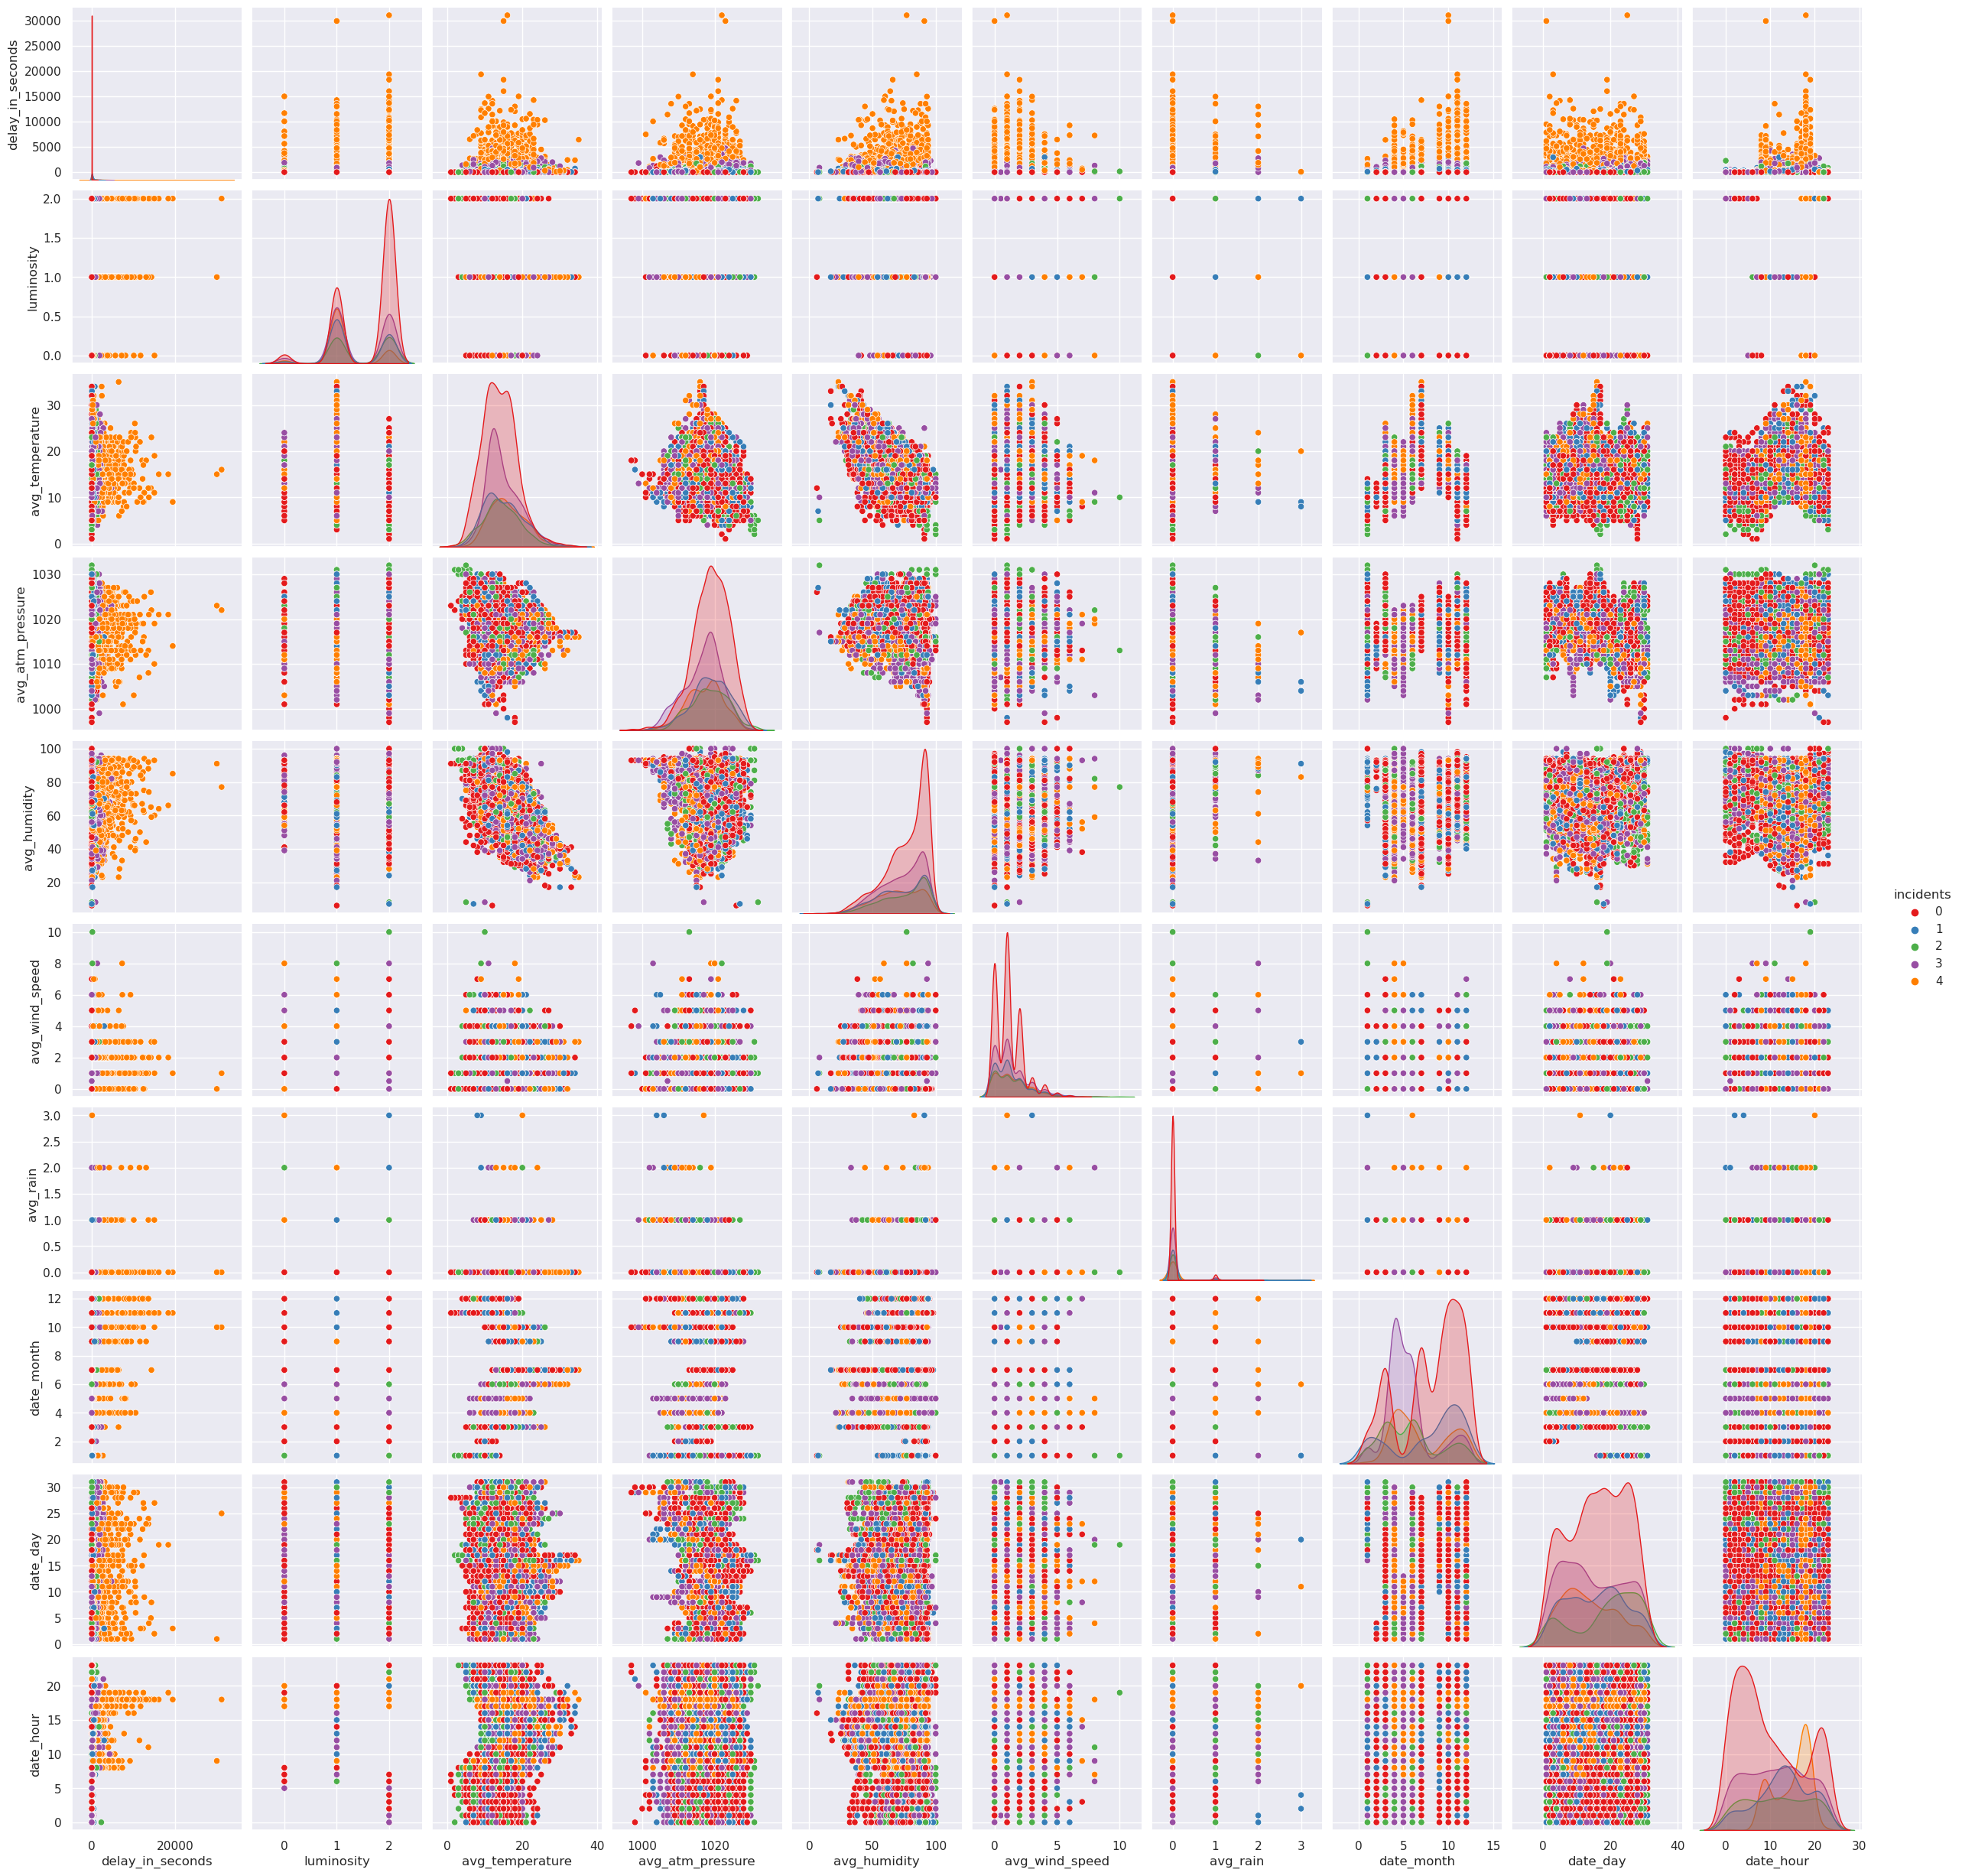

In [34]:
sns.pairplot(data, hue='incidents', palette='Set1')

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

In [127]:
...

Ellipsis

# Train Test Split

** Split your data into a training set and a testing set.**

In [35]:
data.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,date_month,date_day,date_hour
0,0,2,12.0,1013.0,70.0,1.0,0,0,3,15,23
1,385,2,12.0,1007.0,91.0,1.0,0,0,12,25,18
2,69,1,14.0,1025.0,64.0,0.0,0,1,3,12,15
3,2297,1,15.0,1028.0,75.0,1.0,0,4,9,29,9
4,0,1,27.0,1020.0,52.0,1.0,0,3,6,13,11


In [36]:
test.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,date_month,date_day,date_hour
0,1211,1,15.0,1018.0,80.0,0.0,0,3,15,23
1,0,2,16.0,1018.0,41.0,2.0,0,12,25,18
2,0,1,22.0,1017.0,71.0,0.0,0,3,12,15
3,140,1,18.0,1008.0,81.0,3.0,0,9,29,9
4,0,1,20.0,1022.0,86.0,0.0,0,6,13,11


In [86]:
X = data.drop('incidents', axis=1)
Y = data['incidents']
#X_train = data.drop(['incidents'], axis=1)
#y_train = data['incidents']
#X_test = test

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=2022)

## Decison Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [79]:
#Create an instance of a Decision Tree classifier
#Again, defining the random_state for reproducibility
clf = DecisionTreeClassifier(random_state=2022)

In [80]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [81]:
predictions = clf.predict(X_test)
predictions

array([1, 4, 0, ..., 3, 1, 3])

In [82]:
#predictions = pd.DataFrame(predictions)
#predictions.columns = ['Incidents']
#predictions.index += 1
#replace_map = {0 : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
#predictions.replace(replace_map, inplace = True)
#predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

In [83]:
confusion_matrix(y_test, predictions)

array([[613,  13,   5,   1,   0],
       [ 17, 167,  10,   7,   0],
       [  3,  15, 134,  22,   1],
       [  0,   6,  11, 271,  25],
       [  0,   2,   0,  23, 154]])

In [84]:
accuracy_score(y_test, predictions)

0.8926666666666667

In [85]:
precision_score(y_test, predictions, average='macro')

0.8641079661089739

In [142]:
recall_score(y_test, predictions, average='macro')

0.894481451944717

In [144]:
f1_score(y_test, predictions, average='macro')

0.8951396067647304

In [146]:
fbeta_score(y_test, predictions, beta=0.5, average='macro')

0.8956781684665576

## SVM

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  5000 non-null   int64  
 1   luminosity        5000 non-null   int64  
 2   avg_temperature   5000 non-null   float64
 3   avg_atm_pressure  5000 non-null   float64
 4   avg_humidity      5000 non-null   float64
 5   avg_wind_speed    5000 non-null   float64
 6   avg_rain          5000 non-null   int64  
 7   date_month        5000 non-null   int64  
 8   date_day          5000 non-null   int64  
 9   date_hour         5000 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 390.8 KB


In [70]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X_train, y_train, cv=10)
scores

array([0.544, 0.524, 0.566, 0.556, 0.566, 0.556, 0.55 , 0.534, 0.55 ,
       0.546])

In [71]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.55 accuracy with a standard deviation of 0.01


In [72]:
model = SVC(random_state=2021)
model.fit(X_train, y_train)

SVC(random_state=2021)

In [75]:
predictions = model.predict(X_test)
#predictions = pd.DataFrame(predictions)
#predictions.columns = ['Incidents']
#predictions.index += 1
#replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
#predictions.replace(replace_map, inplace = True)
#predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

In [159]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [160]:
print("%0.2f accuracy" % accuracy_score(y_test, predictions))

0.60 accuracy


/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


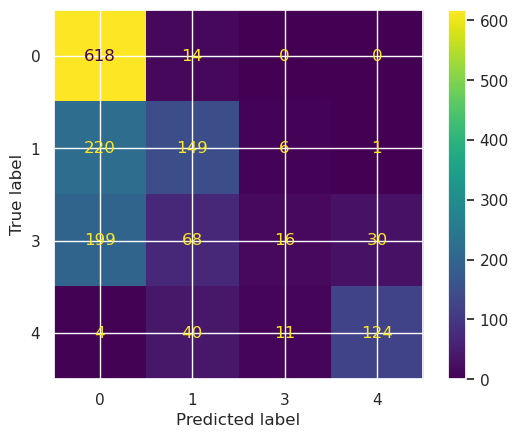

In [161]:
plot_confusion_matrix(model, X_test, y_test)

In [162]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       632
           1       0.55      0.40      0.46       376
           3       0.48      0.05      0.09       313
           4       0.80      0.69      0.74       179

    accuracy                           0.60      1500
   macro avg       0.61      0.53      0.51      1500
weighted avg       0.58      0.60      0.53      1500



In [163]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3)

In [166]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   1.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [167]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [168]:
grid.best_estimator_

SVC(C=1000, gamma=0.001, random_state=2021)

/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


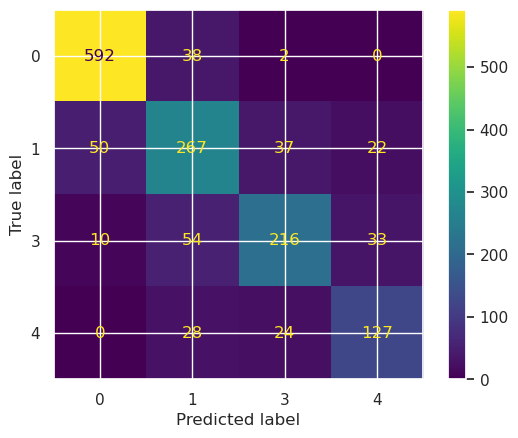

In [169]:
plot_confusion_matrix(grid, X_test, y_test)

In [170]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       632
           1       0.69      0.71      0.70       376
           3       0.77      0.69      0.73       313
           4       0.70      0.71      0.70       179

    accuracy                           0.80      1500
   macro avg       0.77      0.76      0.76      1500
weighted avg       0.80      0.80      0.80      1500



## Neural

Build our neural network 

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler


2022-11-21 19:31:43.369595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [89]:
#one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(Y)
Y_one_hot = pd.DataFrame(lb_results, columns=lb.classes_)

In [90]:
#Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
#scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(Y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#Y_scaled = pd.DataFrame(scaler_y.transform(Y[Y.columns]), columns=Y.columns)

In [91]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_one_hot, test_size=0.30, random_state=2022)

In [92]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    #model.add(Dense(20, input_dim=10, activation=activation))
    model.add(Dense(20, input_dim=10, activation='relu'))
    model.add(Dense(10, activation=activation))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

In [93]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0


2022-11-21 19:31:52.086484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 19:31:52.088873: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


_________________________________________________________________


In [94]:
TUNING_DICT = {
    'activation': ['relu', 'tanh'],
    'learning_rate' : [0.001],
    'batch_size' : [64],
    'epochs' : [20]
}

In [95]:
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

model = KerasClassifier(model=build_model, activation='relu', learning_rate=0.01)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           verbose = 3)

grid_search.fit(X_train, y_train, validation_split=0.2)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Epoch 1/20
40/40 [==============================] - 1s 22ms/step - loss: 1.6009 - accuracy: 0.1369 - val_loss: 1.5759 - val_accuracy: 0.2016
Epoch 2/20
40/40 [==============================] - 1s 29ms/step - loss: 1.5549 - accuracy: 0.3472 - val_loss: 1.5288 - val_accuracy: 0.4127
Epoch 3/20
40/40 [==============================] - 0s 11ms/step - loss: 1.5126 - accuracy: 0.3909 - val_loss: 1.4742 - val_accuracy: 0.4127
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 1.4694 - accuracy: 0.3909 - val_loss: 1.4219 - val_accuracy: 0.4127
Epoch 5/20
40/40 [==============================] - 1s 19ms/step - loss: 1.4386 - accuracy: 0.3917 - val_loss: 1.3924 - val_accuracy: 0.4143
Epoch 6/20
40/40 [==============================] - 1s 14ms/step - loss: 1.4184 - accuracy: 0.3968 - val_loss: 1.3747 - val_accuracy: 0.4238
Epoch 7/20
40/40 [==============================] - 0s 9ms/step - loss: 1.4008 - accuracy: 0.4

GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=KerasClassifier(activation='relu', learning_rate=0.01, model=<function build_model at 0x7f94c44f08b0>),
             param_grid={'activation': ['relu', 'tanh'], 'batch_size': [64],
                         'epochs': [20], 'learning_rate': [0.001]},
             scoring='accuracy', verbose=3)

In [96]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
accuracy = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for accuracy, param in zip(accuracy, params):
    print("%f with: %r" % (accuracy, param))


Best: 0.503714 using {'activation': 'tanh', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}
0.479143 with: {'activation': 'relu', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}
0.503714 with: {'activation': 'tanh', 'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}


In [97]:
best_mlp_model = grid_search.best_estimator_

In [114]:
from livelossplot import PlotLossesKerasTF

In [119]:
#print the validation accuracy and loss after each epoch
plot_losses = PlotLossesKerasTF()

best_mlp_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[plot_losses], verbose=1)

Epoch 1/20
55/55 [==============================] - 1s 15ms/step - loss: 1.4737 - accuracy: 0.3914 - val_loss: 1.4214 - val_accuracy: 0.4247
Epoch 2/20
55/55 [==============================] - 0s 8ms/step - loss: 1.4221 - accuracy: 0.4083 - val_loss: 1.3930 - val_accuracy: 0.4273
Epoch 3/20
55/55 [==============================] - 1s 10ms/step - loss: 1.3939 - accuracy: 0.4151 - val_loss: 1.3663 - val_accuracy: 0.4247
Epoch 4/20
55/55 [==============================] - 1s 13ms/step - loss: 1.3665 - accuracy: 0.4266 - val_loss: 1.3451 - val_accuracy: 0.4400
Epoch 5/20
55/55 [==============================] - 1s 17ms/step - loss: 1.3452 - accuracy: 0.4383 - val_loss: 1.3223 - val_accuracy: 0.4513
Epoch 6/20
55/55 [==============================] - 1s 13ms/step - loss: 1.3224 - accuracy: 0.4497 - val_loss: 1.2990 - val_accuracy: 0.4573
Epoch 7/20
55/55 [==============================] - 1s 13ms/step - loss: 1.3033 - accuracy: 0.4637 - val_loss: 1.2822 - val_accuracy: 0.4647
Epoch 8/20
55/

KerasClassifier(
	model=<function build_model at 0x7f94c44f08b0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	activation=tanh
	learning_rate=0.001
	class_weight=None
)

In [46]:
predictions = best_mlp_model.predict(X_test)

24/24 [==============================] - 0s 15ms/step
